<a href="https://colab.research.google.com/github/Sandhya-29/Glacier-Avalanche-Prediction/blob/main/Glacier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATADIR = "/content/drive/MyDrive/Glacier_dataset"
CATEGORIES = ["glacier_images","nonglacier_images"]

In [ ]:
IMG_SIZE = 300

In [ ]:
training_data=[]
def create_training_data():
    c=0
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                c+=1
                print("Image",c,"resized")
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


Image 1 resized
Image 2 resized
Image 3 resized
Image 4 resized
Image 5 resized
Image 6 resized
Image 7 resized
Image 8 resized
Image 9 resized
Image 10 resized
Image 11 resized
Image 12 resized
Image 13 resized
Image 14 resized
Image 15 resized
Image 16 resized
Image 17 resized
Image 18 resized
Image 19 resized
Image 20 resized
Image 21 resized
Image 22 resized
Image 23 resized
Image 24 resized
Image 25 resized
Image 26 resized
Image 27 resized
Image 28 resized
Image 29 resized
Image 30 resized
Image 31 resized
Image 32 resized
Image 33 resized
Image 34 resized
Image 35 resized
Image 36 resized
Image 37 resized
Image 38 resized
Image 39 resized
Image 40 resized
Image 41 resized
Image 42 resized
Image 43 resized
Image 44 resized
Image 45 resized
Image 46 resized
Image 47 resized
Image 48 resized
Image 49 resized
Image 50 resized
Image 51 resized
Image 52 resized
Image 53 resized
Image 54 resized
Image 55 resized
Image 56 resized
Image 57 resized
Image 58 resized
Image 59 resized
Image 

In [ ]:
import random
random.shuffle(training_data)
X=[]
y=[]
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X = np.array(X)
X=X/255
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(layers.Dense(2, activation = 'softmax'))
# model=Sequential()
# model.add(layers.Conv2D(32,(3,3),activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Flatten())
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(2,activation='softmax'))



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
29/29 [==============================] - 196s 7s/step - loss: 3.4013 - accuracy: 0.5771 - val_loss: 0.2322 - val_accuracy: 0.9029
Epoch 2/5
29/29 [==============================] - 194s 7s/step - loss: 0.4519 - accuracy: 0.8473 - val_loss: 0.1701 - val_accuracy: 0.9223
Epoch 3/5
29/29 [==============================] - 191s 7s/step - loss: 0.2381 - accuracy: 0.9331 - val_loss: 0.1889 - val_accuracy: 0.9417
Epoch 4/5
29/29 [==============================] - 190s 7s/step - loss: 0.2005 - accuracy: 0.9282 - val_loss: 0.1042 - val_accuracy: 0.9515
Epoch 5/5
29/29 [==============================] - 189s 7s/step - loss: 0.1434 - accuracy: 0.9515 - val_loss: 0.1478 - val_accuracy: 0.9515


In [ ]:
model.save('/content/drive/MyDrive/Glacier_dataset/my_model.h5') 

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Glacier_dataset/my_model.h5')

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=10)
print("test loss, test acc:", results)


NameError: ignored

In [ ]:
results

[0.1321301907300949, 0.9524752497673035]

In [ ]:
# for i in range(len(X_test[:10])):
#   plt.imshow(X_test[i])
#   plt.show(block=True)
#   print(y_test[i])

In [ ]:
# test_data=[]
# def create_test_data():
#     c=0
#     for category in CATEGORIES:
#         path=os.path.join(DATADIR,category)
#         class_num=CATEGORIES.index(category)
#         if category == "nonglacier_images":
#             for img in os.listdir(path):
#                 try:
#                     c+=1
#                     print("Image",c,"resized")
#                     img_array=cv2.imread(os.path.join(path,img))
#                     new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#                     test_data.append([new_array,class_num])
#                 except Exception as e:
#                     pass
# create_test_data()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Glacier_dataset/my_model.h5')

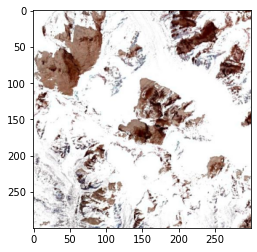

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.1989.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

NameError: ignored

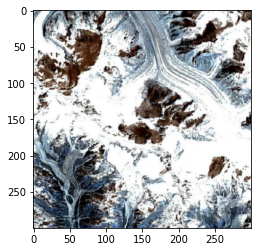

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.2013.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

48615


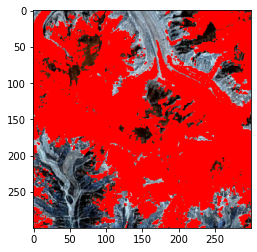

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

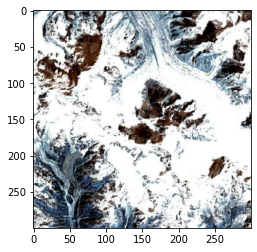

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.2014.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

54688


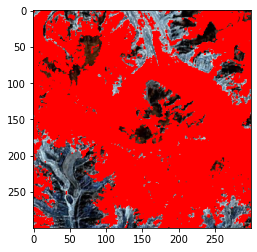

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

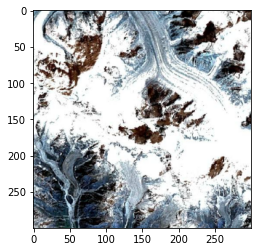

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.2015.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

48173


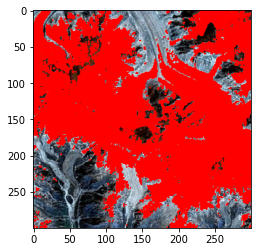

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

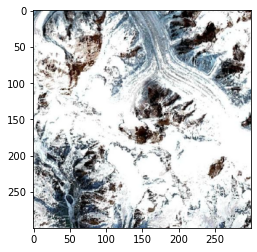

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.2016.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

60487


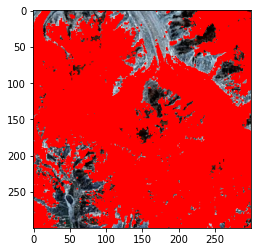

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

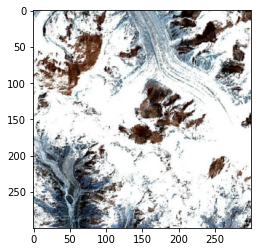

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.2017.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

60753


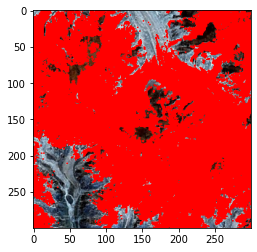

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

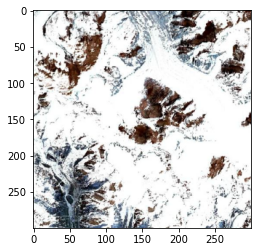

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.2018.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

69619


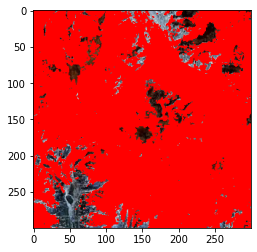

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

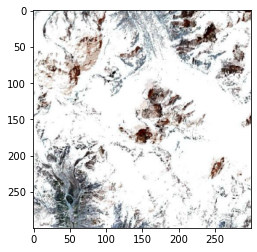

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.2019.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

76883


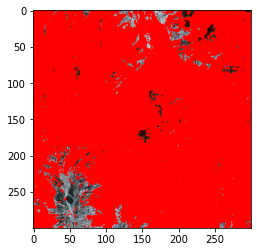

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

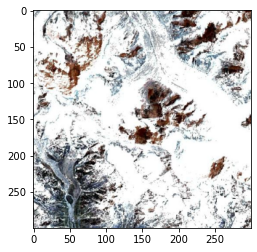

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Charobari_Resized/12.2020.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

67883


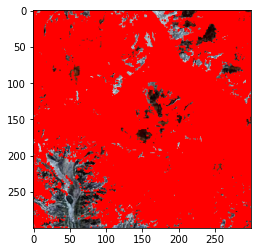

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

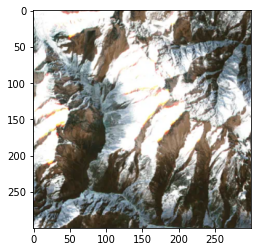

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Screenshot (24).png')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

44152


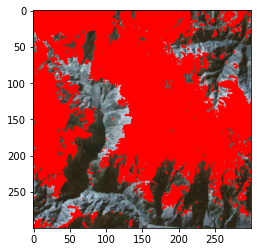

In [ ]:
source_img=img_array
M=1
N=1
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

44360


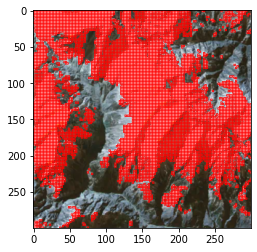

In [ ]:
source_img=img_array
M=2
N=2
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

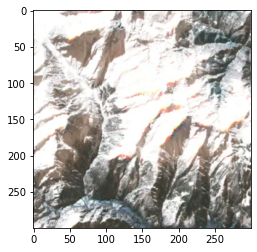

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/Screenshot (26).png')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

65420


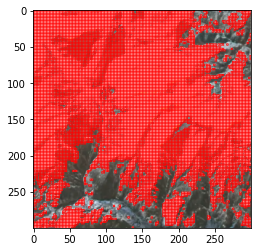

In [ ]:
source_img=img_array
M=2
N=2
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)

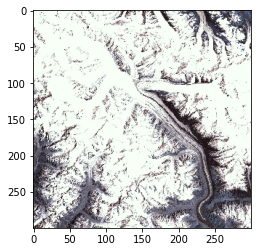

glacier_images


In [ ]:
img_array=cv2.imread('/content/drive/MyDrive/Glacier_dataset/siachen.jpg')
img_array=cv2.resize(img_array,(300,300))
plt.imshow(img_array)
plt.show()
new_array=np.expand_dims(img_array,0)
prediction = model.predict([new_array/255])
print(CATEGORIES[prediction.argmax()])

67044


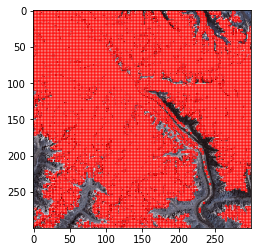

In [ ]:
source_img=img_array
M=2
N=2
x0=[]
import math 
from PIL import Image, ImageDraw  
for x in range(0,img_array.shape[0],M):
  for y in range(0,img_array.shape[1],N):
    slices = img_array[x:x+M,y:y+N]
    new_array=cv2.resize(slices,(300,300))
    # plt.imshow(new_array)
    # plt.show(block=True)
    new_array=np.expand_dims(new_array,0)
    prediction = model.predict([new_array/255])

    if CATEGORIES[prediction.argmax()]=="glacier_images":
      # plt.imshow(slices)
      # plt.show(block=True)
      x0.append([x,y,x+M,y+N])
source_img = Image.fromarray( img_array.astype( np.uint8 ) , 'RGB' )
draw = ImageDraw.Draw( source_img )
area=0
for i,j,k,l in x0:
  draw.rectangle([j,i,l,k] ,outline ="red",width=1) 
  area=area+(abs(j-l)*abs(k-i))
plt.imshow(source_img)
print(area)